In [1]:
import io
from PIL import Image
import ipywidgets as widgets
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

In [2]:
uploader = widgets.FileUpload(multiple=False)
display(uploader)

FileUpload(value=(), description='Upload')

In [3]:
imported_images = []

for file in uploader.value:
    
    #imported_images.append(Image.open(io.BytesIO(file['content'])))
    
    file_bytes = np.asarray(bytearray(file['content']), dtype=np.uint8)
    opencv_image = cv2.imdecode(file_bytes, 1)
    opencv_image = cv2.cvtColor(opencv_image,cv2.COLOR_BGR2RGB) # Color from BGR to RGB
    imported_images.append(opencv_image)

model_path = "../models/cnn-covid-77.h5"
model = load_model(model_path)

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 49, 49, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 32)        0         
 g2D)                                                            
                                                        

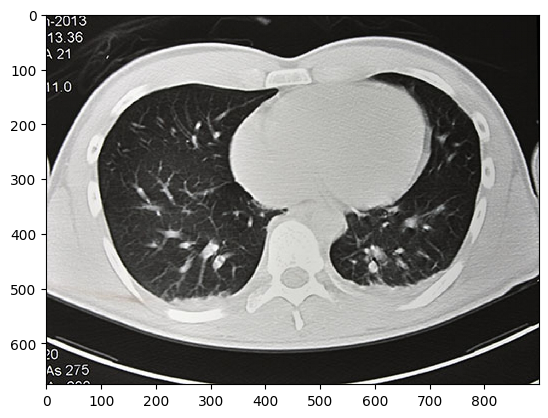

In [4]:
for img in imported_images:
    plt.imshow(img, interpolation='nearest')
    plt.show()

In [8]:
def make_prediction(image, model):
    # Make prediction
    x = cv2.resize(imported_images[0],(100,100))
    x = np.expand_dims(x,axis=0)    
    y = model.predict(x)
    ans = np.argmax(y,axis=1)

    # Print output
    if(ans==0):
        out = widgets.HTML(f'# Image {1} Result: COVID')
    elif(ans==1):
        out = widgets.HTML(f'# Image {1} Result: Healthy')
    else:
        out = widgets.HTML(f'# Image {1} Result: Misc. Pulmonary Disorder')
        
    disp_image = widgets.Image()
    
    return (out, disp_image)

In [14]:
out, disp_image = make_prediction(img, model)
display(out)
display(disp_image)

1/1 [==============================] - 0s 13ms/step


HTML(value='# Image 1 Result: COVID')

Image(value=b'')